<a href="https://colab.research.google.com/github/Inshalmunaf/Deep_Learning_Project1/blob/main/DeepLearning__Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samuelcortinhas/cats-and-dogs-image-classification")

print("Path to dataset files:", path)

100%|██████████| 64.4M/64.4M [00:03<00:00, 20.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/samuelcortinhas/cats-and-dogs-image-classification/versions/4


In [2]:
import os
import pandas as pd
import numpy as np
import cv2

In [3]:
Test_path = os.path.join(path,'test')
Train_path = os.path.join(path,'train')


In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D , MaxPool2D ,Dense, Flatten , BatchNormalization , Dropout

In [5]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = Train_path,
    labels = 'inferred',
    label_mode ='int',
    batch_size = 32,
    image_size = (256,256)
)
test_ds = keras.utils.image_dataset_from_directory(
    directory = Test_path,
    labels = 'inferred',
    label_mode ='int',
    batch_size = 32,
    image_size = (256,256)
)

Found 557 files belonging to 2 classes.
Found 140 files belonging to 2 classes.


In [6]:
#Normalize
def process(image , label):
  image = tf.cast(image/255 , tf.float32)
  return image,label

test_ds = test_ds.map(process)
train_ds = train_ds.map(process)


# ****Custom Model Building****

In [7]:
# Model Building
model = Sequential()

model.add(Conv2D( 32 ,kernel_size=(3,3) , padding= 'valid' , activation = 'relu' , input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2) , padding='valid' , strides = 2))

model.add(Conv2D( 64 ,kernel_size=(3,3) , padding= 'valid' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2) , padding='valid' , strides = 2))

model.add(Conv2D( 128 ,kernel_size=(3,3) , padding= 'valid' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2) , padding='valid' , strides = 2))

model.add(Flatten())

model.add(Dense(128 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(64 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1 , activation = 'sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [9]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [10]:
history = model.fit(train_ds , epochs= 10  , validation_data = test_ds)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.5130 - loss: 11.2308 - val_accuracy: 0.4714 - val_loss: 1.0471
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step - accuracy: 0.5856 - loss: 14.5098 - val_accuracy: 0.5429 - val_loss: 1.2456
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 231ms/step - accuracy: 0.5162 - loss: 10.4643 - val_accuracy: 0.5000 - val_loss: 14.2491
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 239ms/step - accuracy: 0.5727 - loss: 10.2684 - val_accuracy: 0.5000 - val_loss: nan
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 246ms/step - accuracy: 0.5683 - loss: 7.5136 - val_accuracy: 0.5000 - val_loss: 26.5677
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 235ms/step - accuracy: 0.6101 - loss: 4.4711 - val_accuracy: 0.5000 - val_loss: 19.7863
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 275ms/step - accuracy: 0.5137 - loss: 3.5227 - val_accuracy: 0.5000 - val_loss: 9.6562
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 277ms/step - accuracy: 0.5614 - loss: 2.5197 - val_accuracy: 

In [11]:
import matplotlib.pyplot as plt

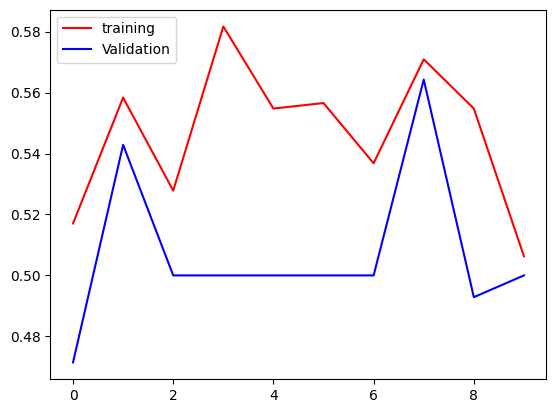

In [12]:
plt.plot(history.history['accuracy'] , color = 'red' ,label = 'training')
plt.plot(history.history['val_accuracy'] , color = 'blue' ,label = 'Validation')
plt.legend()
plt.show()

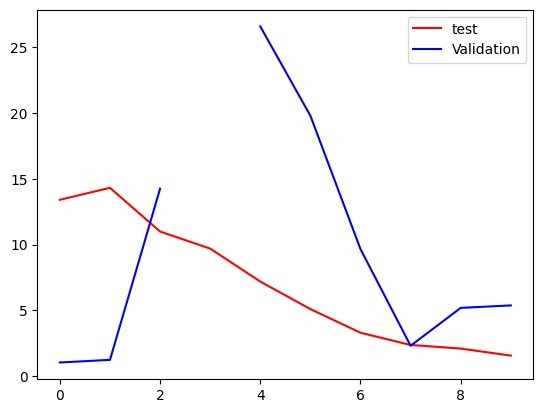

In [13]:
plt.plot(history.history['loss'] , color = 'red' ,label = 'test')
plt.plot(history.history['val_loss'] , color = 'blue' ,label = 'Validation')
plt.legend()
plt.show()

# **Using Pre Trained Model (VGG16)**

In [14]:
from tensorflow.keras.applications import VGG16
# Loading the pretrained model (VGG16)
base_model = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (256,256,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


# Basic Transfer Learning (VGG16) | Dropout & Augmentation Added | **Part A**

In [15]:
# Freezing the base model
base_model.trainable = False

In [16]:
from tensorflow.keras.layers import RandomFlip , RandomRotation ,RandomZoom

In [17]:
# CReating Own Classifier
model_assembled = Sequential([
    # Data Augmentation
    RandomFlip('horizontal', input_shape=(256,256,3)),
    RandomRotation(0.1),
    RandomZoom(0.1),

    base_model,
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model_assembled.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 256, 256, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,909,249 (72.13 MB)

 Trainable params: 4,194,561 (16.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [19]:
from tensorflow.keras.optimizers import Adam
#Compilation of model
model_assembled.compile(
    optimizer= Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [20]:
#Model Building
historyV2 = model_assembled.fit(
    train_ds,
    validation_data=test_ds,
    epochs =10
    )

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 614ms/step - accuracy: 0.5169 - loss: 2.1452 - val_accuracy: 0.7571 - val_loss: 0.5382
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 326ms/step - accuracy: 0.7525 - loss: 0.5055 - val_accuracy: 0.8000 - val_loss: 0.4490
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 317ms/step - accuracy: 0.8015 - loss: 0.4167 - val_accuracy: 0.8143 - val_loss: 0.4108
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 331ms/step - accuracy: 0.8756 - loss: 0.3298 - val_accuracy: 0.7786 - val_loss: 0.4521
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 341ms/step - accuracy: 0.8399 - loss: 0.3769 - val_accuracy: 0.8000 - val_loss: 0.4244
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 311ms/step - accuracy: 0.8591 - loss: 0.3434 - val_accuracy: 0.7714 - val_loss: 0.4625
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 291ms/step - accuracy: 0.8633 - loss: 0.2893 - val_accuracy: 0.7929 - val_loss: 0.4409
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 297ms/step - accuracy: 0.8682 - loss: 0.2840 - val_accuracy: 

# Fine Tuning the model(VGG16) | Building pon Part A's model |  **Part B**

In [21]:
# Freezing the base model
base_model.trainable = True

In [22]:
for x in base_model.layers:
  print(x)

<InputLayer name=input_layer_1, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<MaxPooling2D name=block5_pool, built=True>


In [23]:
#Freezing all layers excet last block(High Level features ) : Block 5
for x in base_model.layers[:-4]:
  x.trainable = False

In [24]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [25]:
model_assembled.compile(
    optimizer = Adam(learning_rate = 1e-5),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [26]:
model_assembled.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 256, 256, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,909,249 (72.13 MB)

 Trainable params: 11,273,985 (43.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [27]:
print("Starting to fine tune")
history_fine_tune= model_assembled.fit (
    train_ds,
    validation_data = test_ds,
    epochs= 15,

)

Starting to fine tune
Epoch 1/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 408ms/step - accuracy: 0.9127 - loss: 0.2425 - val_accuracy: 0.7786 - val_loss: 0.4134
Epoch 2/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 327ms/step - accuracy: 0.9326 - loss: 0.1815 - val_accuracy: 0.8214 - val_loss: 0.3924
Epoch 3/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 334ms/step - accuracy: 0.9303 - loss: 0.1831 - val_accuracy: 0.8357 - val_loss: 0.3877
Epoch 4/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 345ms/step - accuracy: 0.9596 - loss: 0.1463 - val_accuracy: 0.8429 - val_loss: 0.4068
Epoch 5/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 360ms/step - accuracy: 0.9528 - loss: 0.1344 - val_accuracy: 0.8429 - val_loss: 0.3823
Epoch 6/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 378ms/step - accuracy: 0.9353 - loss: 0.1431 - val_accuracy: 0.8286 - val_loss: 0.3747
Epoch 7/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 361ms/step - accuracy: 0.9531 - loss: 0.1333 - val_accuracy: 0.8214 - val_loss: 0.4617
Epoch 8/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 356ms/step - accuracy: 0.9508 - loss: 0

# Graph Plotting Overfitting Checks

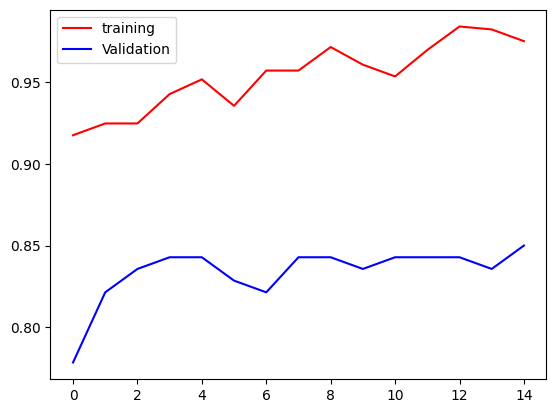

In [28]:
plt.plot(history_fine_tune.history['accuracy'] , color = 'red' ,label = 'training')
plt.plot(history_fine_tune.history['val_accuracy'] , color = 'blue' ,label = 'Validation')
plt.legend()
plt.show()

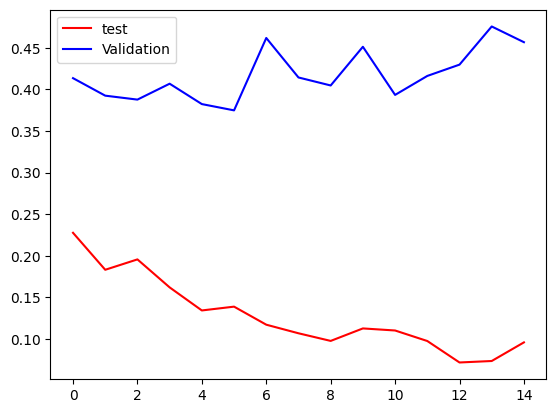

In [29]:
plt.plot(history_fine_tune.history['loss'] , color = 'red' ,label = 'test')
plt.plot(history_fine_tune.history['val_loss'] , color = 'blue' ,label = 'Validation')
plt.legend()
plt.show()

# **Using PreTrained Model (MobileNetV2)**

In [30]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = Train_path,
    labels = 'inferred',
    label_mode ='int',
    batch_size = 32,
    image_size = (256,256)
)
test_ds = keras.utils.image_dataset_from_directory(
    directory = Test_path,
    labels = 'inferred',
    label_mode ='int',
    batch_size = 32,
    image_size = (256,256)
)

Found 557 files belonging to 2 classes.
Found 140 files belonging to 2 classes.


In [31]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Flatten , Dense , Input , Lambda , Dropout
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.optimizers import Adam


In [32]:
#Load the model
base_model_MobileNet = MobileNetV2(
    weights="imagenet",
    include_top= False,
    input_shape=(256,256,3)
)

/tmp/ipython-input-2506543163.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_MobileNet = MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [33]:
#Freeze the top layers
base_model_MobileNet.trainable= False

In [34]:
#Model Building
model_MobileNet = Sequential([
    Input(shape = (256,256,3)),
    Lambda(tf.keras.applications.mobilenet_v2.preprocess_input),

    #Data Augmentation
    RandomFlip('horizontal'),
    RandomRotation(0.1),
    RandomZoom(0.2),

    base_model_MobileNet,
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.3),
    Dense(1 , activation = 'sigmoid')

])

In [35]:
model_MobileNet.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                 │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_1 (RandomFlip)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (None, 256, 256, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_1 (RandomZoom)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 8, 8, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 81920)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │    10,485,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,744,001 (48.61 MB)

 Trainable params: 10,486,017 (40.00 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [36]:
#Model Compilation
model_MobileNet.compile(
    optimizer = Adam(learning_rate=0.001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [37]:
#Model running
history_Mobilenet = model_MobileNet.fit(
    train_ds,
    validation_data=test_ds,
    epochs=15
)

Epoch 1/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 362ms/step - accuracy: 0.7909 - loss: 2.9227 - val_accuracy: 0.9786 - val_loss: 0.1192
Epoch 2/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 218ms/step - accuracy: 0.9613 - loss: 0.4099 - val_accuracy: 0.9714 - val_loss: 0.6699
Epoch 3/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 281ms/step - accuracy: 0.9746 - loss: 0.3100 - val_accuracy: 0.9643 - val_loss: 0.4048
Epoch 4/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 245ms/step - accuracy: 0.9713 - loss: 0.2962 - val_accuracy: 0.9786 - val_loss: 0.2404
Epoch 5/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 240ms/step - accuracy: 0.9835 - loss: 0.1363 - val_accuracy: 0.9714 - val_loss: 0.5264
Epoch 6/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 287ms/step - accuracy: 0.9742 - loss: 0.1674 - val_accuracy: 0.9571 - val_loss: 0.4670
Epoch 7/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 257ms/step - accuracy: 0.9745 - loss: 0.3663 - val_accuracy: 0.9643 - val_loss: 0.2456
Epoch 8/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 247ms/step - accuracy: 0.9867 - loss: 0.1354 - val_accuracy: 0

# Graph Plotting for Mobile Net - Overfitting Checks

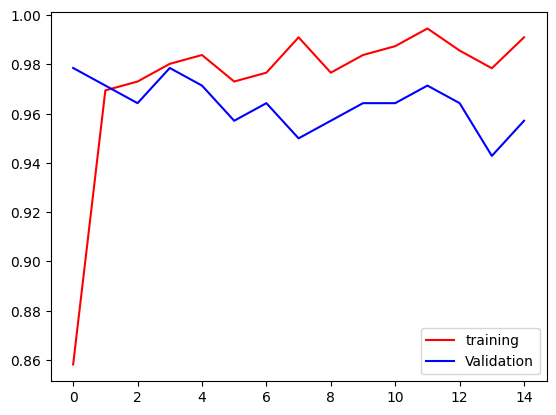

In [38]:
plt.plot(history_Mobilenet.history['accuracy'] , color = 'red' ,label = 'training')
plt.plot(history_Mobilenet.history['val_accuracy'] , color = 'blue' ,label = 'Validation')
plt.legend()
plt.show()

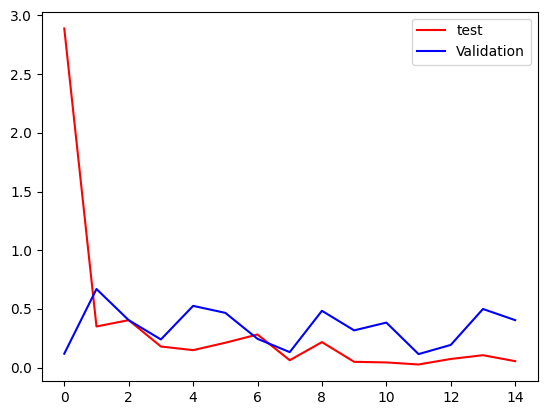

In [39]:
plt.plot(history_Mobilenet.history['loss'] , color = 'red' ,label = 'test')
plt.plot(history_Mobilenet.history['val_loss'] , color = 'blue' ,label = 'Validation')
plt.legend()
plt.show()

In [58]:
Y_true = []
Y_predicted =[]
#Iterate over the test data to get images and labels
for images ,labels in test_ds:
  Y_true.extend(labels.numpy())
  pred = model_MobileNet(images)
  Y_predicted.extend(pred.numpy())

print(Y_true)

[np.int32(0), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(0), np.int32(0), np.int32(0), np.int32(1), np.int32(0), np.int32(1), np.int32(0), np.int32(0), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(0), np.int32(1), np.int32(0), np.int32(0), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(0), np.int32(0), np.int32(1), np.int32(0), np.int32(0), np.int32(1), np.int32(0), np.int32(1), np.int32(1), np.int32(0), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(0), np.int32(1), np.int32(1), np.int32(0), np.int32(1), np.int32(0), np.int32(1), np.int32(0), np.int32(1), np.int32(0), np.int32(0), np.int32(0), np.int32(0), np.int32(0), np.int32(1), np.int32(0), np.int32(1), np.int32(0), np.int32(0), np.int32(0), np.int32(0), np.int32(0), np.int32(1), np.int32(0), np.int32(0), np.int32(1), np.int32(0), np.int32(1), np.int32(0), np.int32(0), np.int32(1), np.int32(0), np.int32(1)

In [59]:
#converting into nupy array
Y_true = np.array(Y_true)
Y_predicted = np.array(Y_predicted)
#converting probabilities scores into classification
Y_predicted = (Y_predicted > 0.5).astype(int)


In [60]:
from sklearn.metrics import classification_report
class_names = ['cats' , 'dogs']

report = classification_report(Y_true , Y_predicted , target_names=class_names)
print("Classification Report - MobileNet-V2")
print(report)

Classification Report - MobileNet-V2
              precision    recall  f1-score   support

        cats       0.97      0.93      0.95        70
        dogs       0.93      0.97      0.95        70

    accuracy                           0.95       140
   macro avg       0.95      0.95      0.95       140
weighted avg       0.95      0.95      0.95       140



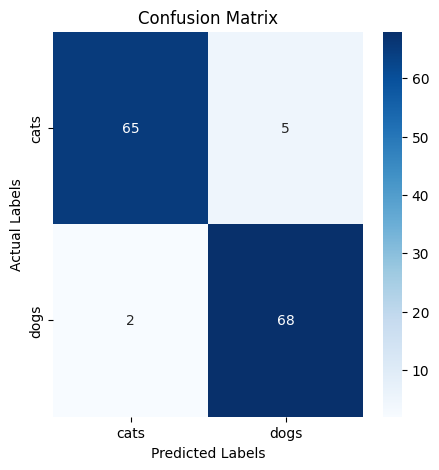

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_true,Y_predicted)

plt.figure(figsize=(5,5))
sns.heatmap(
    cm,
    fmt = 'd',
    annot = True,
    cmap='Blues',
    xticklabels = class_names,
    yticklabels = class_names
)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()